<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_05_ZerosFunciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 5
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods


In an IPython notebook, use the scipy implementation and find the first solution to the equation, write a function with the bisection methods.

What is the solution if a=1, and b=1, what is the solution if a=2 and b=2
  
1. $ 7 = a\sqrt{x^2+1}+be^x\sin x $

2. $a e^{x}-2= b\cos(e^x-2)$

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pylab as plt

import sympy as sp

In [ ]:
# Definamos las  funciones y un arreglo de numpy como su dominio.

a=1
b=1

x=np.linspace(0,3,1000)
f = lambda x:a* np.sqrt(x**2 +1) + b*np.exp(x)*np.sin(x) - 7
g= lambda s: a*np.exp(s) - b*np.cos(np.exp(s) -2 ) -2

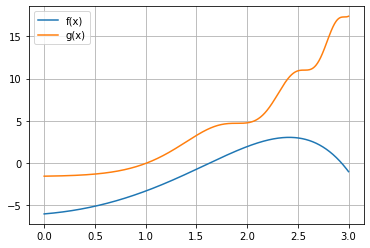

In [ ]:
# Graficamos las curvas de ambas funciones para tener una idea de la ubicacion desus raices.

plt.plot(x,f(x),label='f(x)')
plt.plot(x,g(x),label='g(x)')
plt.grid()
plt.legend()

In [ ]:
# RAÍCES POR EL MÉTODO DE LA BISECCIÓN:

raiz_bis_f=sc.optimize.bisect(f,1.5,2)
raiz_bis_g=sc.optimize.bisect(g,0.7,1.2)
raiz_bis_f


1.628718494926943

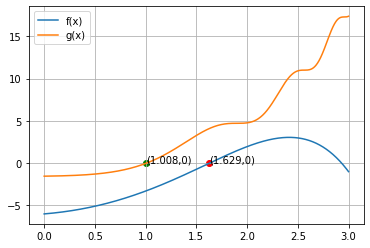

In [ ]:
## Grafica con loas raices de cada funcion ( Bisección)

plt.plot(x,f(x),label='f(x)')
plt.scatter(raiz_bis_f,0,c='red',)
plt.text(raiz_bis_f,0,f'({raiz_bis_f:.3f},0)')

plt.plot(x,g(x),label='g(x)')
plt.scatter(raiz_bis_g,0,c='green')
plt.text(raiz_bis_g,0,f'({raiz_bis_g :.3f},0)')


plt.grid()
plt.legend()

In [ ]:
# RAÍCES POR EL MÉTODO DE NEWTON-RAPHSON:
#Como paso intermedio, debemos calcular las derivadas de f y g

x,a,b=sp.symbols("x,a,b")

def _f(x):
  k = a*sp.sqrt(x**2 +1) + b*sp.exp(x)*sp.sin(x) - 7
  return k



def _g(x):
  k = a*sp.exp(x) - b*sp.cos(sp.exp(x) -2 ) -2
  return k


h= sp.diff(_f(x),x)
j= sp.diff(_g(x),x)

print("df/dx = ",h,'\n',"dg/dx = ",j)





df/dx =  a*x/sqrt(x**2 + 1) + b*exp(x)*sin(x) + b*exp(x)*cos(x) 
 dg/dx =  a*exp(x) + b*exp(x)*sin(exp(x) - 2)


In [ ]:
# Derivadas:

x  = np.linspace(0,3,1000)
a=1
b=1


f = lambda x: np.sqrt(x**2 +1) + (np.exp(x))*np.sin(x) - 7

g= lambda s: np.exp(s) - np.cos(np.exp(s) -2 ) -2

Df= lambda x: x/np.sqrt(x**2 + 1) + np.exp(x)*np.sin(x) + np.exp(x)*np.cos(x)

Dg= lambda s: np.exp(s)*np.sin(np.exp(s) - 2) + np.exp(s)



In [ ]:

x_f0= 1.5    # Punto inicial del método, para f(x)
x_g0=  1.5     # Punto inicial del método, para g(x)


raiz_new_f=sc.optimize.newton(f, x_f0,fprime = Df,)
raiz_new_g=sc.optimize.newton(g, x_g0, fprime = Dg, )

In [ ]:
raiz_new_f

1.6287184949270082

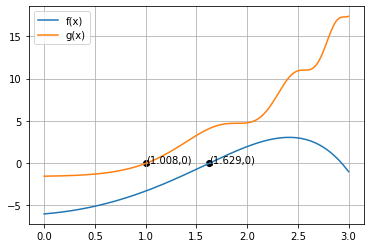

In [ ]:
# Grafica con loas raices de cada funcion ( Newton-Raphson)

plt.plot(x,f(x),label='f(x)')
plt.scatter(raiz_new_f,0,c='black',)
plt.text(raiz_new_f,0,f'({raiz_new_f:.3f},0)')

plt.plot(x,g(x),label='g(x)')
plt.scatter(raiz_new_g,0,c='black')
plt.text(raiz_new_g,0,f'({raiz_new_g :.3f},0)')


plt.grid()
plt.legend()

In [ ]:
# RAÍCES POR EL MÉTODO DE PUNTO FIJO:

# Definir las fuciones auxiliares asociadas a f y g para aplicar el método de punto fijo:

f = lambda x: np.sqrt(x**2 +1) + (np.exp(x))*np.sin(x) - 7
g = lambda x: np.exp(x) - np.cos(np.exp(x) -2 ) -2

f_a = lambda x: x - f(x)
g_a = lambda x: x - g(x)




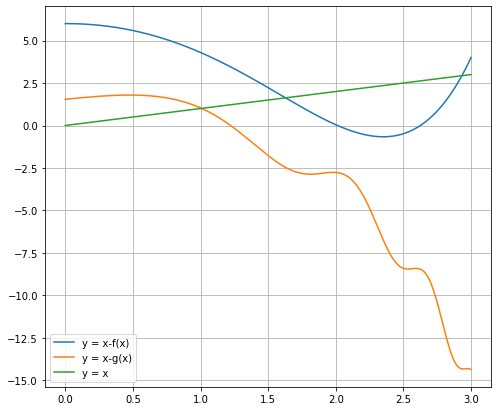

In [ ]:
plt.figure(figsize=(8,7))
plt.plot(x,f_a(x),label='y = x-f(x)')
plt.plot(x,g_a(x),label='y = x-g(x)')
plt.plot(x,x,label ='y = x')
plt.grid()
plt.legend(loc='best')

In [ ]:
raiz_pf_f =sc.optimize.fixed_point(f_a,1.5)
raiz_pf_g =sc.optimize.fixed_point(g_a,0)


raiz_pf_f

array(1.62871849)

# 3. Activity
    
In an IPython notebook and based on the routine NewtonRaphson, write your own routine SecantMethod that performs the previous steps for the Secant Method. Test your code with the function $f(x)$:
    
$f(x) = x - \cos(x)$
</font>

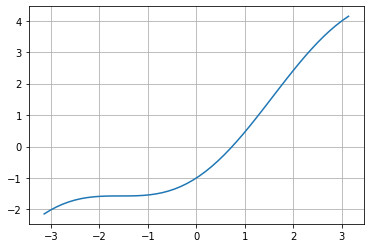

In [ ]:
# Definamos la funcion dada por el enunciado:

x= np.linspace(-np.pi,np.pi)
f = lambda x: x - np.cos(x)

plt.plot(x,f(x))
plt.grid()


In [ ]:
raiz_sec_f= sc.optimize.newton(f,0.5)
raiz_sec_f


0.7390851332151601

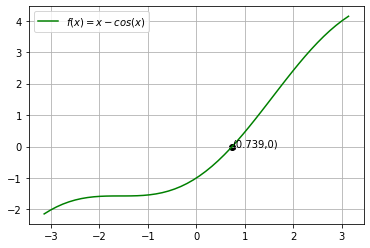

In [ ]:
plt.plot(x,f(x), color = 'green',label='$ f(x)=x - cos(x)$')
plt.scatter(raiz_sec_f,0, c= 'black')
plt.text(raiz_sec_f,0, f'({raiz_sec_f :.3f},0)')


plt.legend()
plt.grid()

# 4. Fixed point methods. 

When a new planet is discovered, there are different methods to estimate its physical properties. Many times is only possible to estimate either the planet mass or the planet radius and the other property has to be predicted through computer modelling.

If one has the planet mass, a very rough way to estimate its radius is to assume certain composition (mean density) and a homogeneous distribution (a very bad assumption!). For example, for the planet [Gliese 832c](http://es.wikipedia.org/wiki/Gliese_832_c) with a mass $M= 5.40 M_{\oplus}$, if we assume an earth-like composition, i.e. $\bar \rho_{\oplus} = 5520\ kg/m^3$, we obtain:

$$R_{g832c} = \left( \frac{3 M_{g832c}}{ 4 \pi \bar\rho_{\oplus} } \right)^{1/3} \approx 1.75 R_{\oplus}$$

That would be the planet radius if the composition where exactly equal to earth's.

A more realistic approach is assuming an internal one-layer density profile like:

$$\rho(r) = \rho_0 \exp\left( -\frac{r}{L} \right)$$

where $\rho_0$ is the density at planet centre and $L$ is a characteristic lenght depending on the composition. From numerical models of planet interiors, the estimated parameters for a planet of are $M= 5.40 M_{\oplus}$ are approximately $\rho_0 = 18000\ kg/m^3$ and $L = 6500\ km$.

Integrating over the planet volume, we obtain the total mass as

$$M = 4\pi \int_0^R \rho(r)r^2dr$$

This is a function of the mass in terms of the planet radius. 

Solving the equation $M(R) = M_{g832c}$ it would be possible to find a more realistic planet radius. However when using numerical models, it is not possible to approach the solution from the left side as a negative mass makes no sense.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc


#Parámetros del problema:

π  = np.pi 
ρ_0= 18000      # Densidad en el núcleo del planeta, [kg/m^3]
L  = 6500e3     # Longitud característica, [m]
M_earth= 5.972e24     # Masa terrestre
ρ_earth=5520    # Densidad media de la Tierra [kg/m^3]
R_earth =6371e3 # Radio terrestre [m]
Mg832c=5.40*M_earth # Masa del planeta Gliese832c
Rg832c=1.75*R_earth



Al resolver la integral: 
$$M = 4\pi \int_0^R \rho(r)r^2dr$$

Se obtiene la masa del planeta como función de su radio:

$$ M(R) = 4\pi \rho_0 L[2 L^2 - e^\frac{-R}{L}(L^2 +(L+R)^2)] $$

In [16]:
# Función M:
M= lambda R: ( 2*L**2 - np.exp(-R/L)*(L**2 +(L+R)**2)) - (Mg832c/(4*π*ρ_0*L))




# Función auxiliar M_a(R):

M_a= lambda R: R- M(R)

# Funcion de masa aproximada para Gliese832c:

def mass_g(R_earth,ρ_earth):                      
  return ((4*π *(1.75*R_earth)**3)*ρ_earth)/3

In [18]:
ratio= mass_g(R_earth,ρ_earth)/M_earth
print(f'M_g832/M_earth = {ratio}') # Este resultado nos indica la razón entre las masas de ambos planetas, que rresulta ser muy cercano al  valor del enunciado


M_g832/M_earth = 5.365928102182779


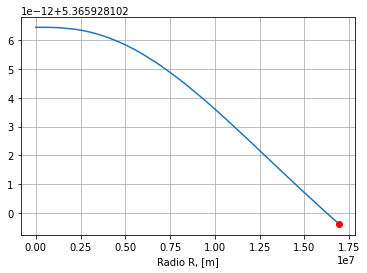

In [76]:
R= np.linspace(1,17000e3,1000)
f= lambda R: (mass_g(R_earth,ρ_earth) -M(R))/M_earth

x0=1.695e7
plt.plot(R,f(R))
plt.plot(x0,f(x0),'ro')

plt.xlabel('Radio R, [m]')
plt.grid()

In [77]:

# Función auxiliar M_a(R):
R= np.linspace(1,17000e3,1000)
M_a= lambda R: R-f(R)


f(x0)

5.365928102179611